# **Import Library & Data:** "*old_cars.csv*"

In [63]:
import pandas as pd
df = pd.read_csv('old_cars.csv')
df.head()

,Car,MPG,Displacement,Horsepower,Weight,Model,Origin
0,AMC Ambassador Brougham,13.0,360.0,175,3821,73,US
1,AMC Ambassador DPL,15.0,390.0,190,3850,70,US
2,AMC Ambassador SST,17.0,304.0,150,3672,72,US
3,AMC Concord,19.4,232.0,90,3210,78,US
4,AMC Concord,24.3,151.0,90,3003,80,US


In [64]:
frame = df[["Car","MPG","Model","Origin"]]
filter_eu = frame["Origin"].isin(["Europe"])
europe = frame[filter_eu]
filter_us = frame["Origin"].isin(["US"])
us = frame[filter_us]
# europe
# europe.sort_values(by="MPG",ascending=True)
# us.sort_values(by="MPG",ascending=False)
df.sort_values(by="Horsepower", ascending=False)

,Car,MPG,Displacement,Horsepower,Weight,Model,Origin
320,Pontiac Grand Prix,16.0,400.0,230,4278,73,US
315,Pontiac Catalina,14.0,455.0,225,4425,70,US
43,Buick Electra 225 Custom,12.0,455.0,225,4951,73,US
44,Buick Estate Wagon (sw),14.0,455.0,225,3086,70,US
79,Chevrolet Impala,14.0,454.0,220,4354,70,US
...,...,...,...,...,...,...,...
200,Ford Maverick,21.0,200.0,0,2875,74,US
204,Ford Mustang Cobra,23.6,140.0,0,2905,80,US
208,Ford Pinto,25.0,98.0,0,2046,71,US
334,Renault Lecar Deluxe,40.9,85.0,0,1835,80,Europe


# **Task 1 :** *Grouped Bar Chart*
###### **Tugas:** Buatlah visualisasi dengan menggunakan bar chart berkelompok, seperti contoh di atas, terkait distribusi rata-rata bensin (MPG) dari semua model berdasarkan asal geografis. Dengan kata lain, anda diminta untuk membuat grafik di mana setiap nilai rata-rata bensin (MPG) dihubungkan dengan 3 bar chart (satu untuk masing-masing asal: AS, Eropa, Jepang) dan menunjukkan bagaimana distribusi nilai rata-rata bensin dibandingkan antar wilayah. Untuk itu, anda harus membagi rentang nilai rata-rata bensin yang mungkin dengan kenaikan 2 mpg.

###### **Author:** Maulana Erlangga (1305213070)

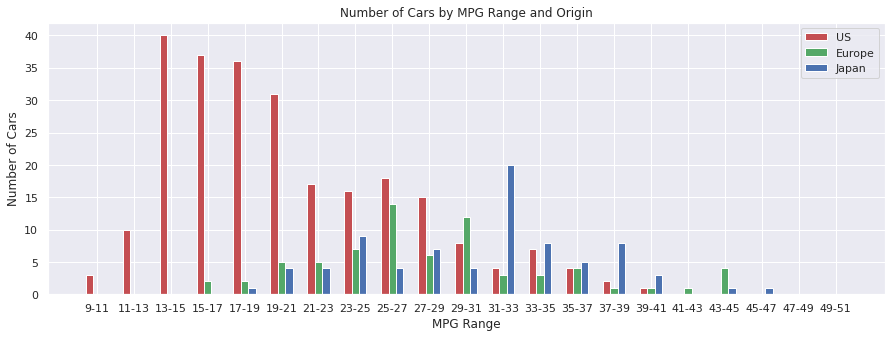

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file CSV
df = pd.read_csv('old_cars.csv')

# Mengubah data float menjadi integer
df['MPG'] = df['MPG'].astype(int)

# Mengelompokkan data berdasarkan negara
us_data = df.loc[df['Origin'] == 'US']
europe_data = df.loc[df['Origin'] == 'Europe']
japan_data = df.loc[df['Origin'] == 'Japan']

# Membuat list MPG yang akan digunakan pada sumbu X
mpg_range = [(i, i+2) for i in range(9, 51, 2)]

# Menghitung jumlah mobil yang memiliki MPG pada setiap range untuk setiap negara
us_count = [len(us_data.loc[(us_data['MPG'] >= i) & (us_data['MPG'] < j)]) for (i, j) in mpg_range]
europe_count = [len(europe_data.loc[(europe_data['MPG'] >= i) & (europe_data['MPG'] < j)]) for (i, j) in mpg_range]
japan_count = [len(japan_data.loc[(japan_data['MPG'] >= i) & (japan_data['MPG'] < j)]) for (i, j) in mpg_range]

# Membuat plot
fig, ax = plt.subplots(figsize=(15, 5))
bar_width = 0.2

# Mengatur posisi bar chart pada sumbu X
r1 = [x - bar_width for x in range(len(mpg_range))]
r2 = [x for x in range(len(mpg_range))]
r3 = [x + bar_width for x in range(len(mpg_range))]

# Menambahkan bar chart untuk setiap negara
ax.bar(r1, us_count, color='r', width=bar_width, label='US')
ax.bar(r2, europe_count, color='g', width=bar_width, label='Europe')
ax.bar(r3, japan_count, color='b', width=bar_width, label='Japan')

# Mengatur label pada sumbu X
labels = [f'{i}-{j}' for (i, j) in mpg_range]
ax.set_xticks(range(len(mpg_range)))
ax.set_xticklabels(labels)

# Menambahkan judul dan label pada sumbu X dan Y
ax.set_xlabel('MPG Range')
ax.set_ylabel('Number of Cars')
ax.set_title('Number of Cars by MPG Range and Origin')
ax.legend()

# Menampilkan plot
plt.show()

# **Task 2 :** *Line Chart*
###### **Tugas:** Gambarkan evolusi temporal dari efisiensi bahan bakar (MPG) untuk setiap asal geografis dari tahun 1970 hingga 1982 menggunakan line chart. Setiap titik menunjukkanrata-rata tahunan dari efisiensi bahan bakar untuk asal yang diberikan dan setiap kurva akan terdiri dari 13 titik. Berikan warna yang berbeda untuk setiap kurva.

###### **Author:** Dimitri Aulia Rasyidin (1305210109)

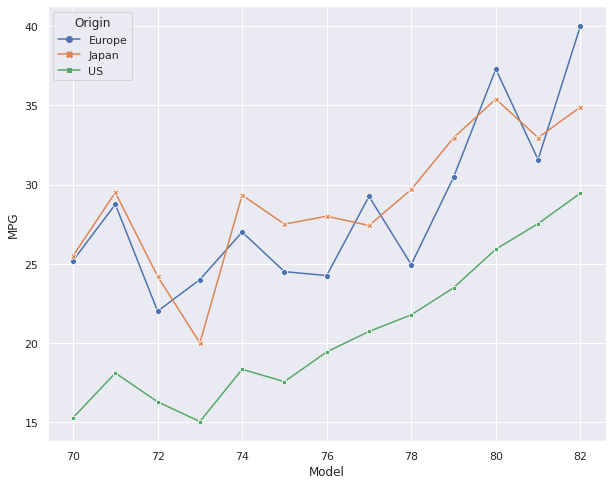

In [69]:
import pandas as pd
import seaborn as sns

# Read the CSV
df = pd.read_csv('old_cars.csv')

# Filter Origins and Models
origins = ['US', 'Japan', 'Europe']
models = range(70,83)
df = df[df['Origin'].isin(origins) & df['Model'].isin(models)]

# Grouping and Calculate AVG
mpg_avg = df.groupby(['Origin', 'Model'])['MPG'].mean().reset_index()
# # Visualize the results using a Seaborn lineplot
sns.lineplot(data=mpg_avg, x='Model', y='MPG', hue='Origin', style="Origin", markers=True, dashes=False);

# **Task 3 :** *Scatter Plot*
###### **Tugas:** Sejauh ini, kita hanya memvisualisasikan satu atribut saja (yaitu konsumsi bahan bakar). Untuk tugas ketiga ini, visualisasikan hubungan antara tenaga kuda dan konsumsi bahan bakar menggunakan scatter plot. Sumbu horizontal merepresentasikan tenaga kuda (Horsepower) dan sumbu vertikal merepresentasikan konsumsi bahan bakar (MPG), dan setiap titik data merepresentasikan mobil tertentu. Terapkan pewarnaan kode warna pada diagram titik-titik untuk menunjukkan tahunnya.

###### **Author:** Dimitri Aulia Rasyidin (1305210109)

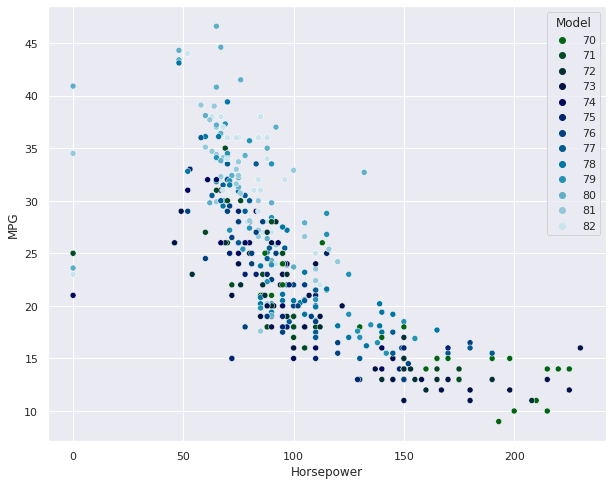

In [70]:
import seaborn as sns

model = df["Model"]
model.unique()

sns.set(rc={"figure.figsize":(10,8)})
sns.scatterplot(data=df, x='Horsepower', y="MPG", hue="Model", palette=sns.color_palette("ocean",13));

# **Task 4 :** *Scatter Plot Matrix*
###### **Tugas:** Sejauh ini, kita hanya memvisualisasikan satu atribut saja (yaitu konsumsi bahan bakar). Untuk tugas ketiga ini, visualisasikan hubungan antara tenaga kuda dan konsumsi bahan bakar menggunakan scatter plot. Sumbu horizontal merepresentasikan tenaga kuda (Horsepower) dan sumbu vertikal merepresentasikan konsumsi bahan bakar (MPG), dan setiap titik data merepresentasikan mobil tertentu. Terapkan pewarnaan kode warna pada diagram titik-titik untuk menunjukkan tahunnya.

###### **Author:** Yaffazka Afazillah Wijaya (1305210076)

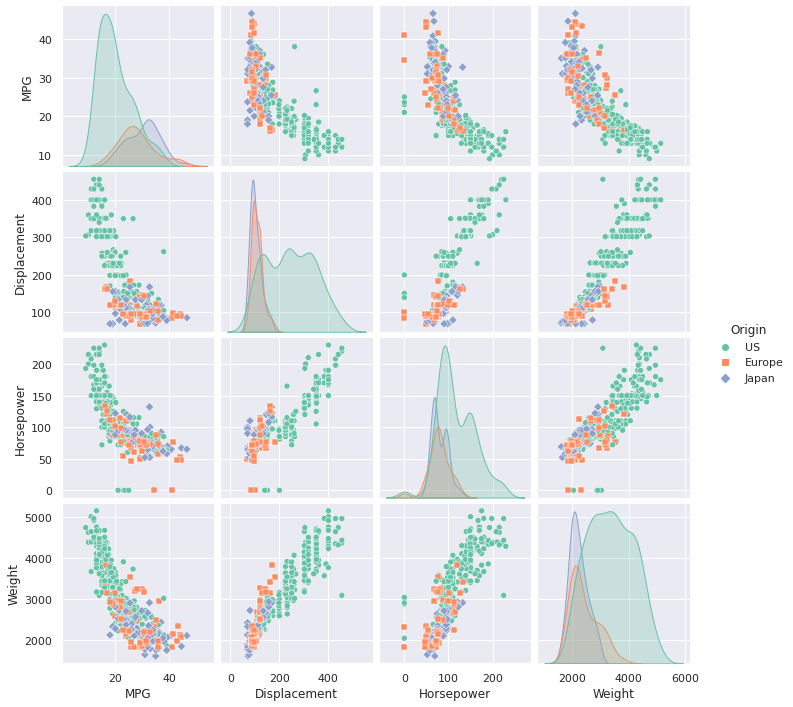

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

task_4 = df[['MPG','Displacement','Horsepower','Weight','Origin']]
sns.pairplot(task_4, kind="scatter", hue="Origin", markers=["o", "s", "D"], palette="Set2")
plt.show()